## 実験概要
DC-SGDにおけるノイズの強度について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

ノイズの種類
- 正規分布
    - 平均0
    - 分散
        - 1.5
        - 2.2
        - 2.4
- 対数正規分布
    - 平均0
    - 分散
        - 1.25
        - 1.75
        - 1.90

トライアルの回数は1000,ただし損失の推移についてはそのうちの一回を使用

## 結果

ノイズが正規分布の場合、分割を多くする方が最終的な期待損失は若干小さくなる。
ノイズが対数正規分布の場合

In [1]:
 import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import DC_SGD
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
X_mean = 5
X_var = 2

w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
noise = "normal"
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]




  0%|          | 0/100 [00:00<?, ?it/s]

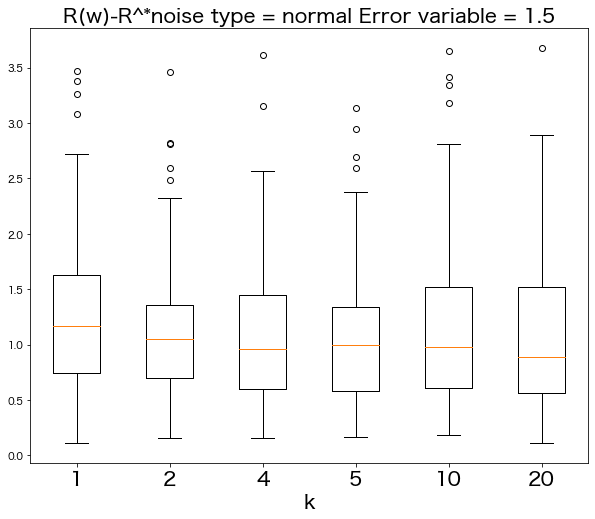

In [3]:
E_var = 1.5
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [4]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.288204,1.120110,1.090669,1.053383,1.137641,1.098871
std,0.747220,0.602115,0.625081,0.635200,0.718758,0.721822
min,0.112674,0.157886,0.158561,0.164556,0.180118,0.111510
25%,0.745399,0.700910,0.601021,0.583119,0.611497,0.559327
50%,1.171792,1.051288,0.961732,0.996785,0.976676,0.892572
75%,1.629590,1.359649,1.444641,1.340262,1.523185,1.523124
max,3.466313,3.463662,3.611304,3.138005,3.650892,3.680731


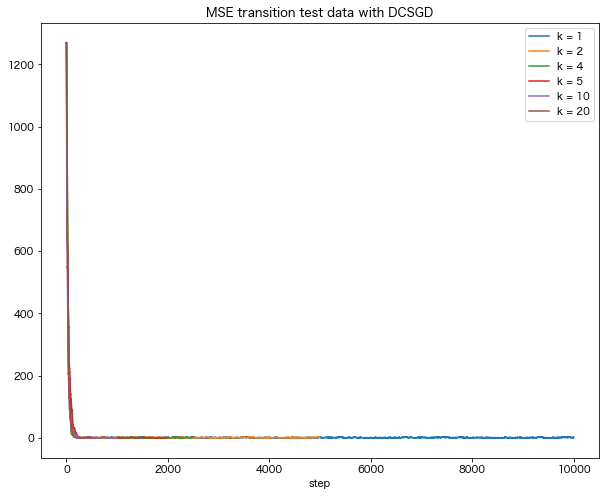

In [5]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

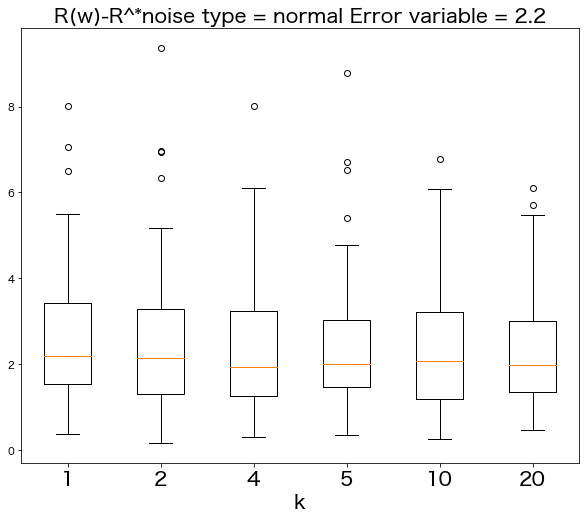

In [6]:
noise = "normal"
E_var = 2.2
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [7]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.555510,2.410293,2.311322,2.385053,2.407511,2.327905
std,1.464533,1.580856,1.448356,1.493032,1.587380,1.319778
min,0.383565,0.163726,0.300162,0.347722,0.249900,0.465328
25%,1.547901,1.299559,1.251909,1.458139,1.179147,1.361160
50%,2.192979,2.152660,1.939211,2.001035,2.078812,1.972143
75%,3.414572,3.279871,3.242879,3.029391,3.219124,3.010596
max,8.012500,9.372807,8.005928,8.779130,6.784379,6.103373


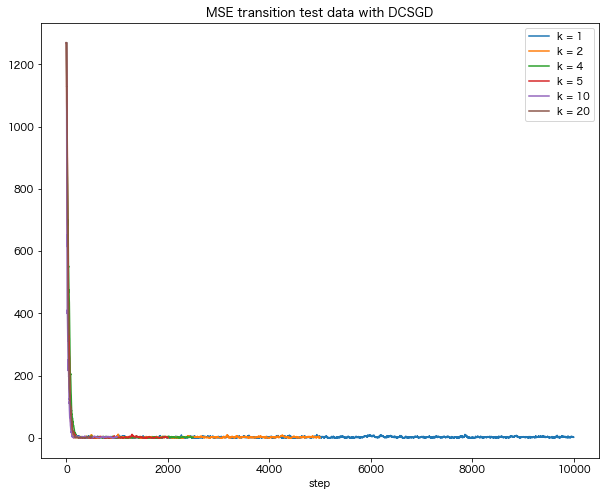

In [8]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

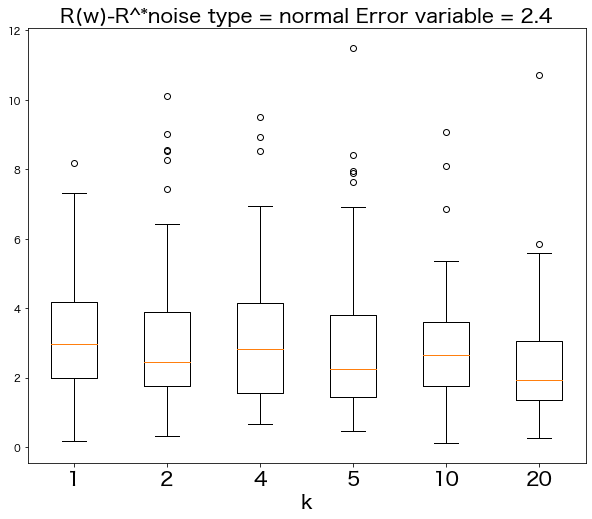

In [9]:
noise = "normal"
E_var = 2.4
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [10]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.110284,3.053026,3.089082,2.861067,2.817569,2.359056
std,1.602580,1.995450,1.861585,2.052110,1.537314,1.577441
min,0.180556,0.320062,0.675136,0.459065,0.116779,0.262316
25%,1.980002,1.771337,1.551148,1.444707,1.744861,1.344145
50%,2.958009,2.442842,2.823800,2.245899,2.652302,1.936135
75%,4.187640,3.896366,4.149285,3.817041,3.599164,3.057249
max,8.192344,10.116117,9.493860,11.501708,9.063231,10.723589


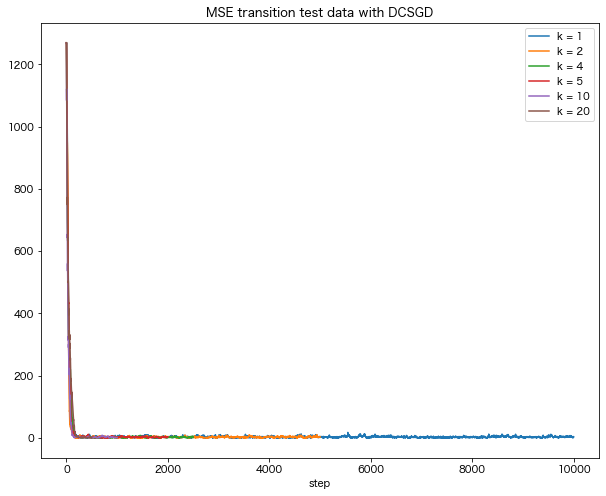

In [11]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

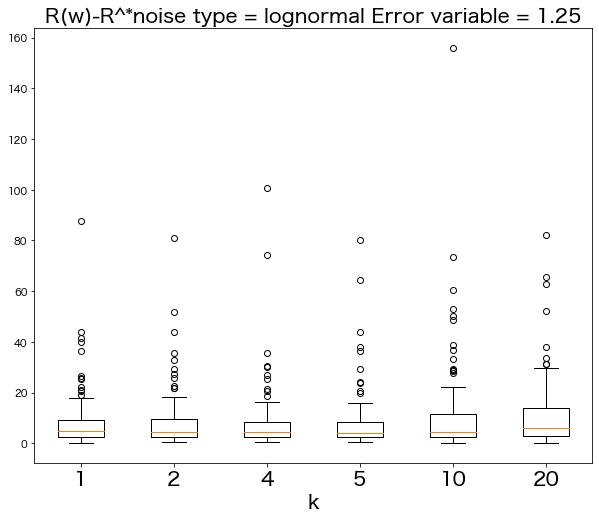

In [12]:
noise = "lognormal"
E_var = 1.25
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [13]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8.601731,8.582750,8.309290,8.240398,11.598761,10.979631
std,11.910901,11.785238,13.468113,12.210370,20.090720,14.168486
min,0.119834,0.607281,0.498105,0.459063,0.179430,0.262108
25%,2.474544,2.528028,2.447034,2.485739,2.489615,2.982186
50%,4.836581,4.595886,4.424405,4.144471,4.626164,5.933499
75%,9.102092,9.515578,8.548831,8.601366,11.528086,14.127325
max,87.578119,80.837160,100.588339,80.175230,156.019665,82.279359


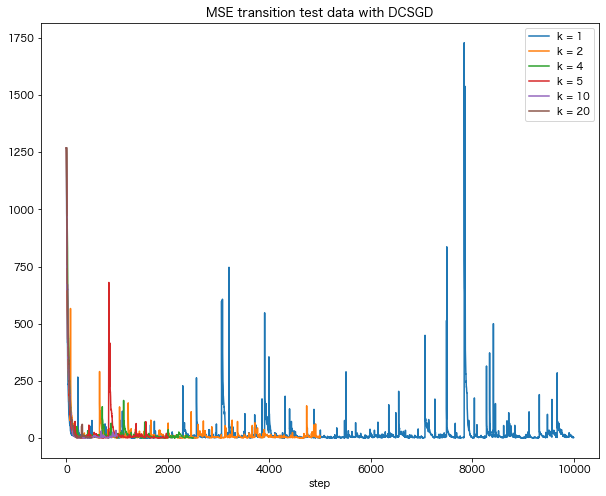

In [14]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

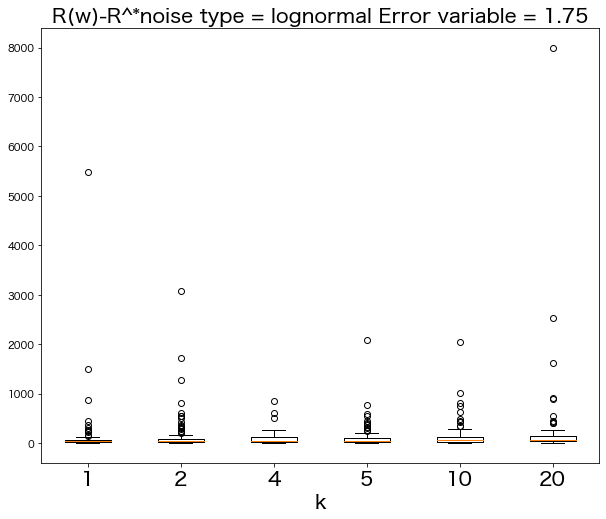

In [15]:
noise = "lognormal"
E_var = 1.75
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [16]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,134.282977,153.136317,83.981419,117.557011,137.624184,232.015776
std,569.690391,386.528975,123.730239,240.695807,259.370126,848.293093
min,3.745385,1.640179,4.911311,3.714684,3.257597,4.261374
25%,19.561200,19.026460,16.554408,19.047082,24.890595,33.085679
50%,33.444726,36.811852,44.169375,46.443481,53.590964,62.345265
75%,64.880756,92.585466,114.046074,112.388537,130.530140,144.914384
max,5481.256547,3085.636282,861.599972,2088.528702,2037.385798,7997.672527


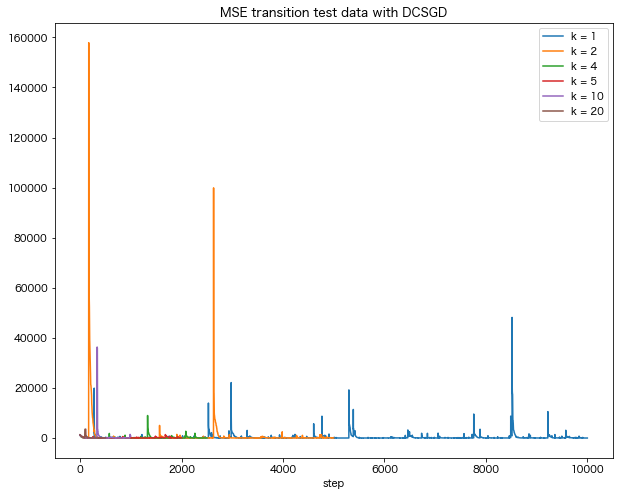

In [17]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

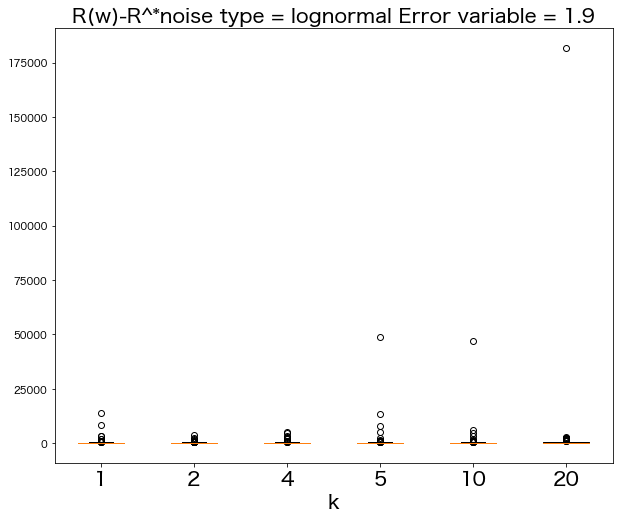

In [18]:
noise = "lognormal"
E_var = 1.90
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [19]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,483.192626,211.154580,318.086820,925.801274,781.891740,2123.307707
std,1658.565005,468.805042,800.258878,5074.437588,4735.460938,18163.799084
min,8.866927,4.357147,6.217282,5.782978,3.523054,3.412032
25%,42.532981,42.884527,32.387302,36.800136,37.387909,37.273436
50%,96.561587,77.405509,81.705175,77.785964,72.488855,100.220919
75%,202.290111,154.635980,203.756785,214.485235,210.321559,299.498184
max,13849.078185,3586.809950,4882.260811,48561.052615,46966.324748,181862.303553


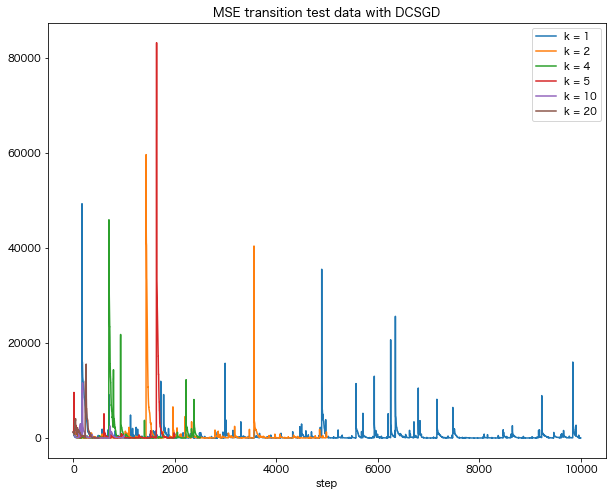

In [20]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)